<a href="https://colab.research.google.com/github/mcansoylu1/do-not-learn-machine-learning/blob/main/SimpleLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##What is Simple Linear Regression?
Simple linear regression is a regression model that estimates the relationship between **one independent variable** and **one dependent variable** using a straight line.


Line Equation

> 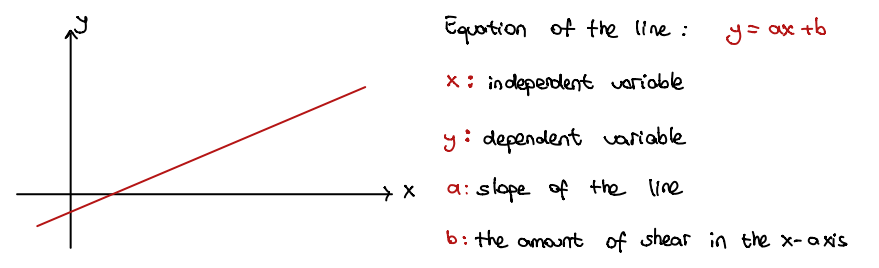

Simple Linear Regression Model
> 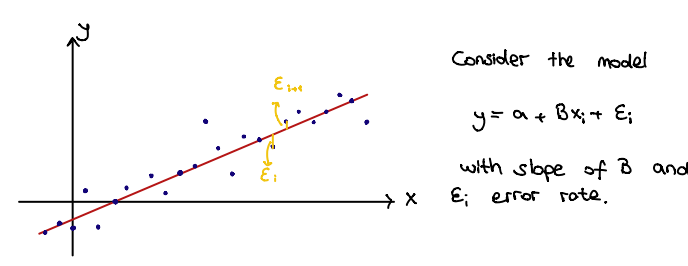

**The aim of this project is to estimate the sales per month.**









##Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##Data Uploading

In [3]:
sales=pd.read_csv('sales.csv')
sales

,Months,Sales
0,8,19671.5
1,10,23102.5
2,11,18865.5
3,13,21762.5
4,14,19945.5
5,19,28321.0
6,19,30075.0
7,20,27222.5
8,20,32222.5
9,24,28594.5


##Get independent variable into a DataFrame

In [4]:
MonthsColumn=sales.iloc[:,:1].values
monthsColumnDataFrame=pd.DataFrame(data=MonthsColumn,index=range(30),columns=['Months'])
monthsColumnDataFrame

,Months
0,8
1,10
2,11
3,13
4,14
5,19
6,19
7,20
8,20
9,24


##Check for missing values and get rid of them

In [5]:
sales.isnull().sum()

Months    0
Sales     2
dtype: int64

In [6]:
#there are two missing values in Sells column, let fill them with mean of column

from sklearn.impute import SimpleImputer
imputer= SimpleImputer(missing_values=np.nan, strategy='mean')

SalesColumn=sales.iloc[:,-1:].values
SalesColumn

array([[19671.5],
       [23102.5],
       [18865.5],
       [21762.5],
       [19945.5],
       [28321. ],
       [30075. ],
       [27222.5],
       [32222.5],
       [28594.5],
       [31609. ],
       [    nan],
       [28478.5],
       [28540.5],
       [30555.5],
       [33969. ],
       [33014.5],
       [41544. ],
       [40681.5],
       [ 4697. ],
       [45869. ],
       [49136.5],
       [50651. ],
       [    nan],
       [54715.5],
       [52791. ],
       [58484.5],
       [56317.5],
       [61195.5],
       [60936. ]])

In [7]:
imputer=imputer.fit(SalesColumn[:,-1:])
SalesColumn[:,-1:]=imputer.transform(SalesColumn[:,-1:])

salesfilledDataFrame=pd.DataFrame(data=SalesColumn,index=range(30),columns=['Sales'])
salesfilledDataFrame

,Sales
0,19671.500000
1,23102.500000
2,18865.500000
3,21762.500000
4,19945.500000
5,28321.000000
6,30075.000000
7,27222.500000
8,32222.500000
9,28594.500000


##Merge each of the DataFrames

In [8]:
noMissing=pd.concat([monthsColumnDataFrame,salesfilledDataFrame],axis=1)
noMissing

,Months,Sales
0,8,19671.500000
1,10,23102.500000
2,11,18865.500000
3,13,21762.500000
4,14,19945.500000
5,19,28321.000000
6,19,30075.000000
7,20,27222.500000
8,20,32222.500000
9,24,28594.500000


##Create Train and Test Splits

In [9]:
months=noMissing[['Months']]
sales=noMissing[['Sales']]

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test=train_test_split(months,sales,test_size=0.33,random_state=0)

##Build the model

In [11]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

##Make predictions

In [12]:
predict=lr.predict(x_test)
predict

array([[20791.43960036],
       [53582.66321202],
       [30071.97458479],
       [29453.2722525 ],
       [50489.15155054],
       [47395.63988906],
       [50489.15155054],
       [29453.2722525 ],
       [35021.59324316],
       [44302.12822759]])

In [13]:
y_test.values

array([[18865.5       ],
       [61195.5       ],
       [28540.5       ],
       [31609.        ],
       [58484.5       ],
       [54715.5       ],
       [56317.5       ],
       [36177.46428571],
       [41544.        ],
       [50651.        ]])

##Visualation

Text(0, 0.5, 'sales')

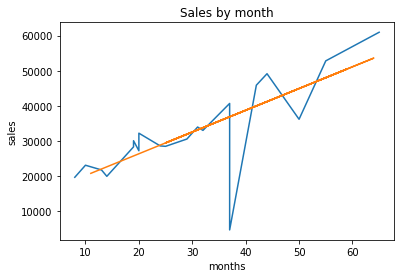

In [14]:
x_train=x_train.sort_index()
y_train=y_train.sort_index()

plt.plot(x_train,y_train)
plt.plot(x_test,lr.predict(x_test))
plt.title("Sales by month")
plt.xlabel("months")
plt.ylabel("sales")